In [32]:
import pandas as pd
import requests
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

In [33]:
experiment = pd.read_csv('/home/jupyter-o-demchenko-18/statistic/Lesson4/experiment_lesson_4.csv')

In [34]:
experiment.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


3. Сопоставьте графики распределения и  экспериментальные группы:

In [8]:
control_group = experiment \
    .query("experiment_group == 'control'")
test_group = experiment \
    .query("experiment_group == 'test'")

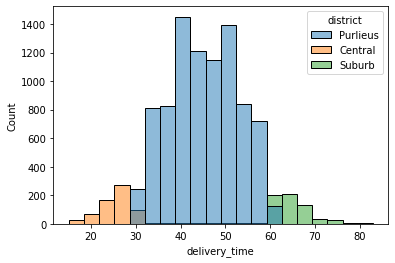

In [11]:
sns.histplot(control_group, x="delivery_time", hue="district", bins=20)


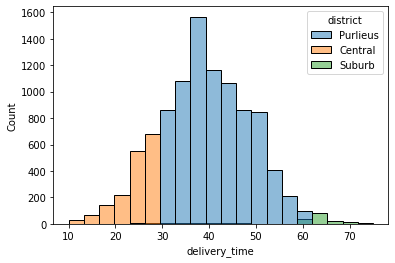

In [12]:
sns.histplot(test_group, x="delivery_time", hue="district", bins=20)

In [ ]:
# Второй вариант

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

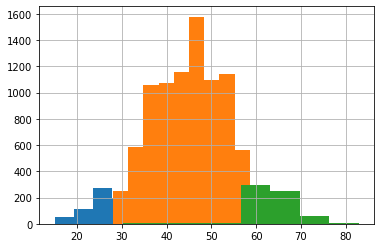

In [14]:
control_group.groupby("district").delivery_time.hist()

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

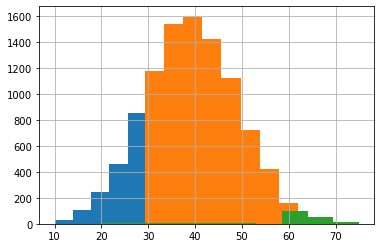

In [15]:
test_group.groupby("district").delivery_time.hist()

4. Посчитайте количество наблюдений в тестовой и контрольной группе. На сколько по модулю отличается количество наблюдений в тесте и контроле?

In [18]:
control_group_sum = experiment \
    .groupby('experiment_group', as_index=False) \
    .agg({'order_id': 'count'})



In [22]:
control_group_sum

,experiment_group,order_id
0,control,10092
1,test,10104


5. Теперь давайте изучим наши распределения. Проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тесте и в контроле.

Обязательно сделайте семплирование перед применением критерия при проверке на нормальность (и для теста, и для контроля), так как на больших выборках вы можете получать неверные результаты: 

experiment[experiment['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17)

In [36]:
# выборка нормального распределения
shapiro_test = experiment[experiment['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17)

In [37]:
# выборка нормального распределения
shapiro_control = experiment[experiment['experiment_group'] == 'control']['delivery_time'].sample(1000, random_state=17)

In [39]:
# тест шапиро-уилка для определения нормальности выборки
ss.shapiro(shapiro_test)

ShapiroResult(statistic=0.9975479245185852, pvalue=0.14013493061065674)

In [40]:
# тест шапиро-уилка для определения нормальности выборки
ss.shapiro(shapiro_control)

ShapiroResult(statistic=0.9974725842475891, pvalue=0.12411931157112122)

In [41]:
# если pvalue > 0.05 , то  распределение нормальное

In [55]:
# рассчитаем стандартное отклонение для 
experiment[experiment['experiment_group'] == 'test']['delivery_time'].std()

9.883308351129061

In [56]:
# рассчитаем стандартное отклонение для контрольной группы
experiment[experiment['experiment_group'] == 'control']['delivery_time'].std()

9.990016960246372

6.Пришло время сравнить средние в тесте и контроле. Внимание: здесь уже не нужно пользоваться методом .sample() — он нам нужен был только для теста Шапиро-Уилка, остальные тесты надо проводить на полных данных.

In [54]:
ss.ttest_ind(experiment[experiment['experiment_group'] == 'test']['delivery_time'], experiment[experiment['experiment_group'] == 'control']['delivery_time'])

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [57]:
t = experiment[experiment['experiment_group'] == 'test']['delivery_time']

In [58]:
c = experiment[experiment['experiment_group'] == 'control']['delivery_time']

In [59]:
ss.ttest_ind(t,c)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

7. На сколько процентов изменилось среднее время доставки в тестовой группе по сравнению с контрольной (округлите до сотых)? 

In [72]:
# расчет среднего времени доставки для тестовой группы
test_mean = experiment[experiment['experiment_group'] == 'test']['delivery_time'].mean()
test_mean

39.04681314330958

In [74]:
# расчет среднего времени доставки для контрольной группы
control_mean = experiment[experiment['experiment_group'] == 'control']['delivery_time'].mean()
control_mean

45.065101070154576

In [76]:
# На сколько процентов изменилось среднее время доставки в тестовой группе по сравнению с контрольной (округлите до сотых)
((test_mean*100/control_mean)-100).round(2)

-13.35

### Вывод: Да, раскатываем новый алгоритм на всех, так как среднее время доставки статистически значимо изменилось. Среднее время доставки в тесте меньше, чем в контроле.